# Overall Analysis
There is a strong correlation between the maximum forecasted temperature and degrees latitude of a given city. This relationship was stronger for the northern hemisphere than the Southern Hemisphere.

There is a moderate negative correlation between maximum forecasted temperature and humidity.

There is a weak positive correlation between cloudiness and humidity.

it would be interesting to split the data between coastal cities and inland cities. It is possible that we would see a change in the observed relationships.

In [44]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from citipy import citipy
import numpy as np
import requests
import scipy.stats as st
from pprint import pprint

# import API key from file
from apikey import weatherkey


In [3]:
# generate a list 500 random coordinate pairs that are well distributed across the coordinate range
longitudes = []
latitudes = []
longitudes = np.array(sample(range(-18000,18001),k=1500))/100
latitudes = np.array(sample(range(-9000,9001),k=1500))/100

In [5]:
# import citipy, create a list of cities from the random coordinate pairs
citylist = []

for entry in coordinates:
    cityname = citipy.nearest_city(entry[0],entry[1]).city_name
    if cityname not in citylist:
        citylist.append(cityname)
   # print(citylist)
    #coordinates["Nearest City"] = citipy.nearest_city(coordinates['latitudes'],coordinates['longitudes']).city_name

In [16]:
#set up loop for each city in citylist
    # make an api call to openweathermap's API
baseurl = "https://api.openweathermap.org/data/2.5/weather?"

citynames = []
citylats = []
citylons = []
country = []
timezone = []
citycount = 1
for city in citylist:
    response = requests.get(f"{baseurl}appid={weatherkey}&units=imperial&q={city}").json()
    try:
        citynames.append(response["name"])
        citylats.append(response["coord"]['lat'])
        citylons.append(response["coord"]['lon'])
        country.append(response["sys"]["country"])
        timezone.append(response["timezone"])
        print(f"{citycount} Information for {city} successfully retreived")
        citycount += 1
    except (KeyError, IndexError):
        print(f'FAIL: Unable to retrive information for {city}')
        

FAIL: Unable to retrive information for buon me thuot
1 Information for ushuaia successfully retreived
2 Information for kloulklubed successfully retreived
3 Information for butaritari successfully retreived
4 Information for syedove successfully retreived
5 Information for mahebourg successfully retreived
6 Information for tiksi successfully retreived
7 Information for punta arenas successfully retreived
8 Information for rikitea successfully retreived
9 Information for luderitz successfully retreived
10 Information for yellowknife successfully retreived
11 Information for chunskiy successfully retreived
12 Information for mataura successfully retreived
13 Information for kapaa successfully retreived
FAIL: Unable to retrive information for saleaula
14 Information for bredasdorp successfully retreived
15 Information for khatanga successfully retreived
16 Information for kyren successfully retreived
17 Information for ahipara successfully retreived
18 Information for bambous virieux suc

In [141]:
# Convert retrieved information to a data frame
citydata = pd.DataFrame.from_dict({"City Name":citynames,"Latitude":citylats,"Longitude":citylons,"Country":country,"UTC +/- (hours)":np.array(timezone)/3600})
display(citydata)

,City Name,Latitude,Longitude,Country,UTC +/- (hours)
0,Ushuaia,-54.8000,-68.3000,AR,-3.0
1,Kloulklubed,7.0419,134.2556,PW,9.0
2,Butaritari,3.0707,172.7902,KI,12.0
3,Syedove,47.0768,38.1560,UA,3.0
4,Mahébourg,-20.4081,57.7000,MU,4.0
...,...,...,...,...,...
562,General Roca,-39.0333,-67.5833,AR,-3.0
563,Redding,40.5865,-122.3917,US,-7.0
564,Kholm,59.2667,32.8500,RU,3.0
565,Penzance,50.1186,-5.5371,GB,1.0


In [142]:
#Save dataframe to a csv file
citydata.to_csv(r'..\\Data\\City_data.csv')

In [30]:
onecall = "https://api.openweathermap.org/data/2.5/onecall?"
citydata["Max Temperature"] = ""
citydata["Humidity"] = ""
citydata["Cloudiness"] = ""
citydata["Wind Speed"] = ""
exclude = "current,minutely,hourly,alerts"
citycounts =1

for index, row in citydata.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    onecallresponse = (requests.get(f"{onecall}lat={lat}&lon={lon}&exclude={exclude}&appid={weatherkey}&units=imperial").json()
                       ['daily'][0])
    try:
        citydata.loc[index, 'Max Temperature'] = onecallresponse['temp']['max']
        citydata.loc[index, 'Humidity'] = onecallresponse['humidity']
        citydata.loc[index, 'Cloudiness'] = onecallresponse['clouds']
        citydata.loc[index, 'Wind Speed'] = onecallresponse['wind_speed']
        print(f'{citycounts} Information successfully retreived for {citydata.loc[index,"City Name"]}')
        citycounts += 1
    except (KeyError, IndexError, SSLEOFError,SSLError):
        print(f'FAIL: Unable to retrieve information for {citydata.loc[index,"City Name"]}')
display(citydata)

1 Information successfully retreived for Ushuaia
2 Information successfully retreived for Kloulklubed
3 Information successfully retreived for Butaritari
4 Information successfully retreived for Syedove
5 Information successfully retreived for Mahébourg
6 Information successfully retreived for Tiksi
7 Information successfully retreived for Punta Arenas
8 Information successfully retreived for Rikitea
9 Information successfully retreived for Lüderitz
10 Information successfully retreived for Yellowknife
11 Information successfully retreived for Chunskiy
12 Information successfully retreived for Mataura
13 Information successfully retreived for Kapaa
14 Information successfully retreived for Bredasdorp
15 Information successfully retreived for Khatanga
16 Information successfully retreived for Kyren
17 Information successfully retreived for Ahipara
18 Information successfully retreived for Bambous Virieux
19 Information successfully retreived for Ribeira Grande
20 Information successfull

,City Name,Latitude,Longitude,Country,UTC +/- (hours),Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ushuaia,-54.8000,-68.3000,AR,-3.0,42.13,84,92,3.33
1,Kloulklubed,7.0419,134.2556,PW,9.0,84.13,85,94,21.12
2,Butaritari,3.0707,172.7902,KI,12.0,83.55,74,99,14.9
3,Syedove,47.0768,38.1560,UA,3.0,65.91,73,97,10.16
4,Mahébourg,-20.4081,57.7000,MU,4.0,79.83,78,40,10.29
...,...,...,...,...,...,...,...,...,...
562,General Roca,-39.0333,-67.5833,AR,-3.0,65.61,52,100,19.55
563,Redding,40.5865,-122.3917,US,-7.0,81.77,28,7,6.53
564,Kholm,59.2667,32.8500,RU,3.0,50.34,43,81,5.59
565,Penzance,50.1186,-5.5371,GB,1.0,50.25,60,3,12.95


In [143]:
#Save data to a csv file. This can be used to load data into memory for analysis
citydata.to_csv(r'..\\Data\\forecast_data.csv')

In [150]:
#convert data types for analysis
citydata["Max Temperature"] = pd.to_numeric(citydata["Max Temperature"])
citydata["Humidity"] = pd.to_numeric(citydata["Humidity"])
citydata["Cloudiness"] = pd.to_numeric(citydata["Cloudiness"])
citydata["Wind Speed"] = pd.to_numeric(citydata["Wind Speed"])
citydata = citydata.rename(columns={"Wind Speed": "Wind Speed (MPH)","Max Temperature":"Max Temperature (F)"})

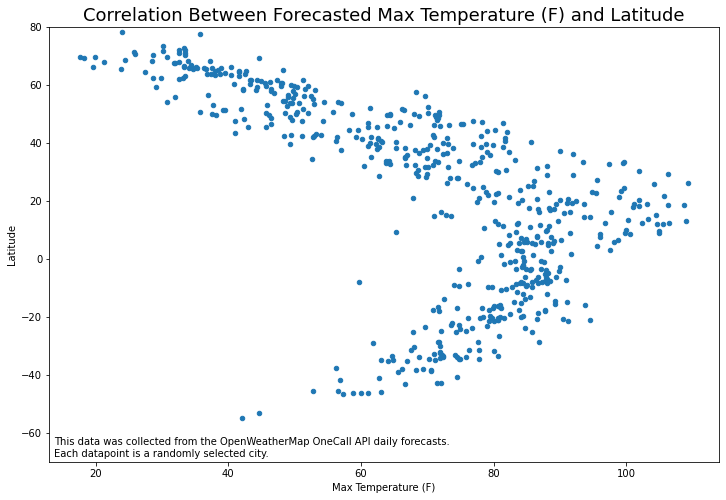

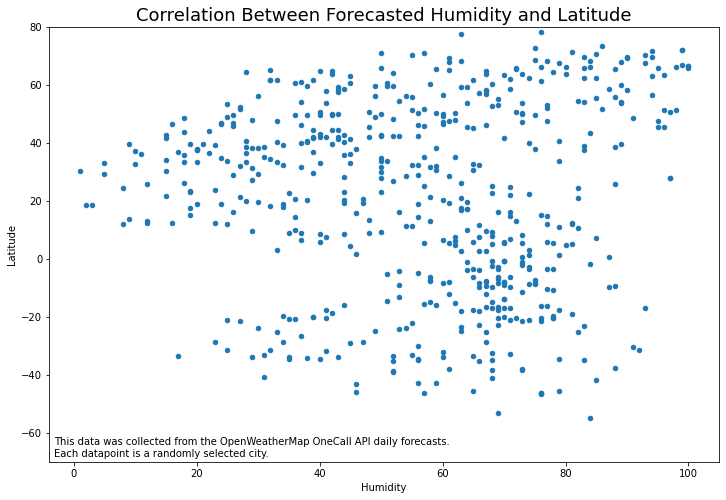

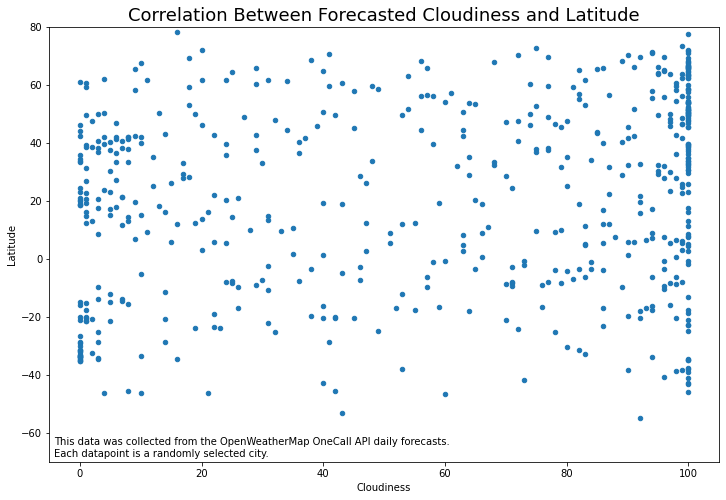

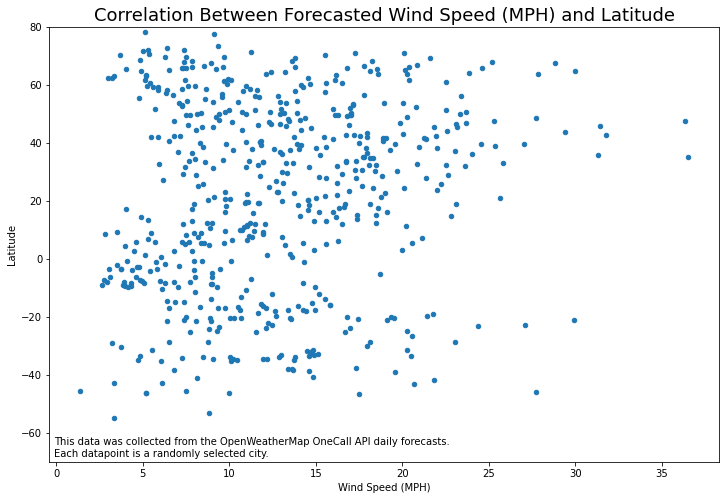

In [100]:
comparelist = ['Max Temperature (F)','Humidity','Cloudiness','Wind Speed (MPH)']
for element in comparelist:
    citydata.plot.scatter(element,"Latitude", figsize = (12,8),ylim=(-70,80))
    plt.title(f'Correlation Between Forecasted {element} and Latitude', fontsize=18)
    plt.annotate(f'''This data was collected from the OpenWeatherMap OneCall API daily forecasts.
Each datapoint is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    imagename = f"..\\Images\\Global{element}vslat"
    plt.savefig(imagename, format='png')

#for each variable in list
    #plot scatter plot vs latitude
    #export each plot to a png file
    #if lat 
        # plot all possible scatter plots vs latitude
        #run linear regression for each plot
        #add regression results to the plot
        #export plot to png file
    #else
        #do the same as above on separate plots
        

In [139]:
# Split the data by hemisphere
southernhemisphere = pd.DataFrame
southernhemisphere =citydata[citydata['Latitude']<0]

northernhemisphere = pd.DataFrame
northernhemisphere = citydata[citydata['Latitude']>0]

#Check for correlations
display(southernhemisphere.corr())
display(northernhemisphere.corr())

,Latitude,Longitude,UTC +/- (hours),Max Temperature (F),Humidity,Cloudiness,Wind Speed (MPH)
Latitude,1.000000,-0.010262,-0.049539,0.778942,0.217500,0.166661,-0.296168
Longitude,-0.010262,1.000000,0.954295,0.010696,0.110334,-0.024232,-0.167304
UTC +/- (hours),-0.049539,0.954295,1.000000,-0.016633,0.105377,0.002003,-0.080967
Max Temperature (F),0.778942,0.010696,-0.016633,1.000000,-0.196068,-0.082877,-0.099422
Humidity,0.217500,0.110334,0.105377,-0.196068,1.000000,0.449221,-0.186474
Cloudiness,0.166661,-0.024232,0.002003,-0.082877,0.449221,1.000000,0.003045
Wind Speed (MPH),-0.296168,-0.167304,-0.080967,-0.099422,-0.186474,0.003045,1.000000


,Latitude,Longitude,UTC +/- (hours),Max Temperature (F),Humidity,Cloudiness,Wind Speed (MPH)
Latitude,1.000000,0.008216,0.091412,-0.871495,0.242861,0.202844,0.024276
Longitude,0.008216,1.000000,0.932968,-0.026695,0.102511,0.035779,-0.038289
UTC +/- (hours),0.091412,0.932968,1.000000,-0.123349,0.149821,0.077067,-0.057173
Max Temperature (F),-0.871495,-0.026695,-0.123349,1.000000,-0.551479,-0.279832,0.031204
Humidity,0.242861,0.102511,0.149821,-0.551479,1.000000,0.367245,-0.157820
Cloudiness,0.202844,0.035779,0.077067,-0.279832,0.367245,1.000000,0.069832
Wind Speed (MPH),0.024276,-0.038289,-0.057173,0.031204,-0.157820,0.069832,1.000000


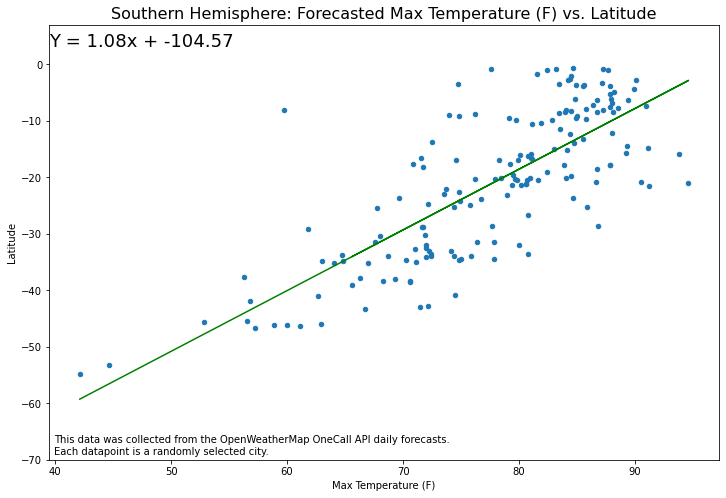

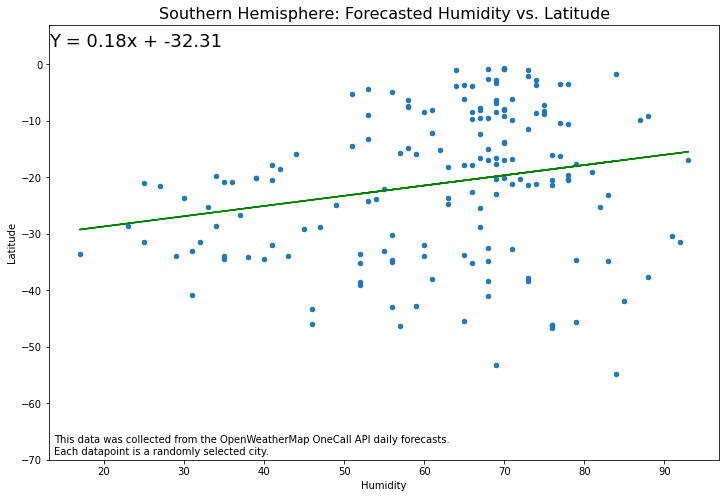

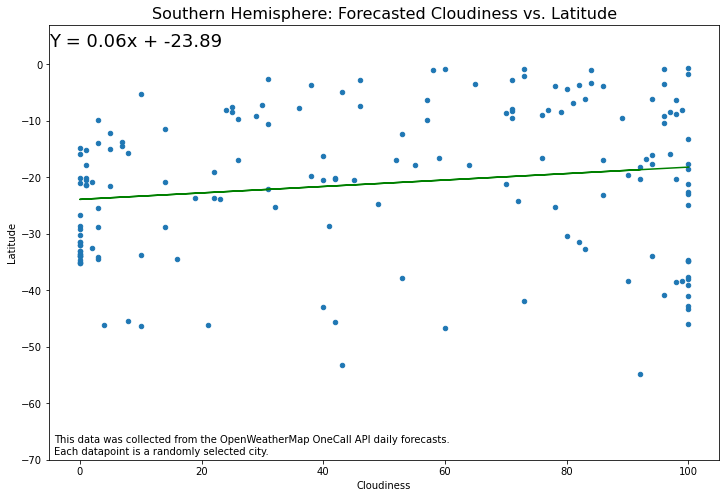

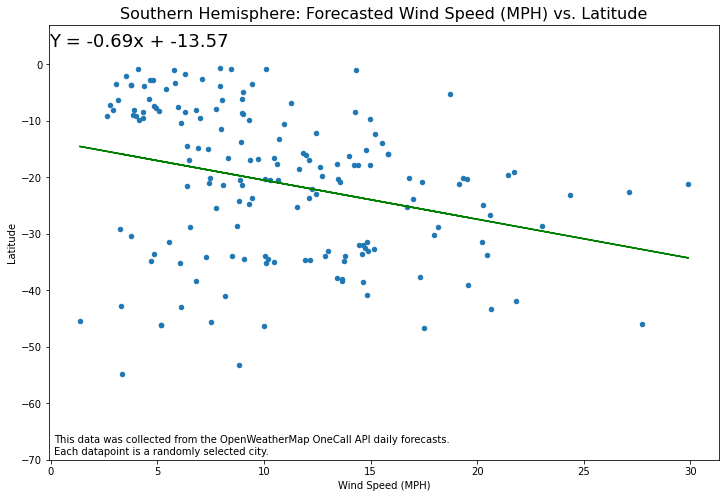

In [140]:
#Southern Hemisphere Visualizations

#Create a loop to make all plots
for element in comparelist:
    #Generate the base plot
    southernhemisphere.plot.scatter(element,"Latitude", figsize = (12,8),ylim = (-70,7))
   
    # perform linear regression and plot the resulting equation
    varaxis = southernhemisphere[f"{element}"]
    (m,b,rvalue,pvalue,stderr) = st.linregress(varaxis,southernhemisphere["Latitude"])
    linearfit = m * varaxis + b
    plt.plot(varaxis,linearfit,'green')
    
    #Improve the format of the visualization
    regressioneq = "Y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.annotate(regressioneq,xy=(0,0.95),fontsize = 18,xycoords='axes fraction')
    plt.title(f'Southern Hemisphere: Forecasted {element} vs. Latitude', fontsize =16)
    plt.annotate(f'''This data was collected from the OpenWeatherMap OneCall API daily forecasts.
Each datapoint is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    
    #Save to file
    imagename = f"..\\Images\\SH_{element}vslat"
    plt.savefig(imagename, format='png')

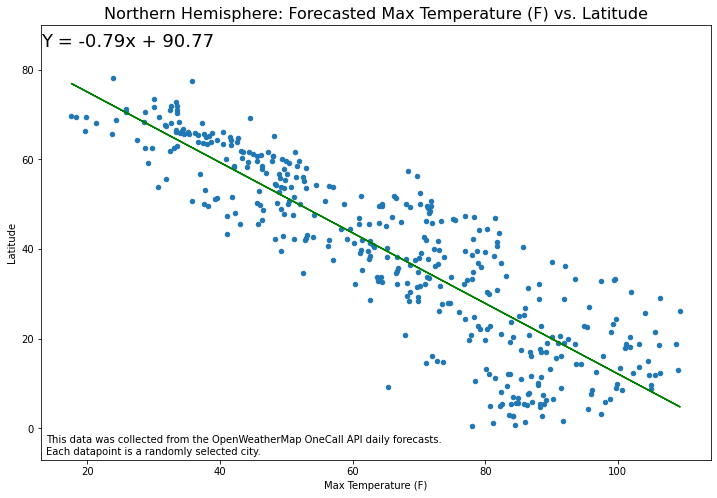

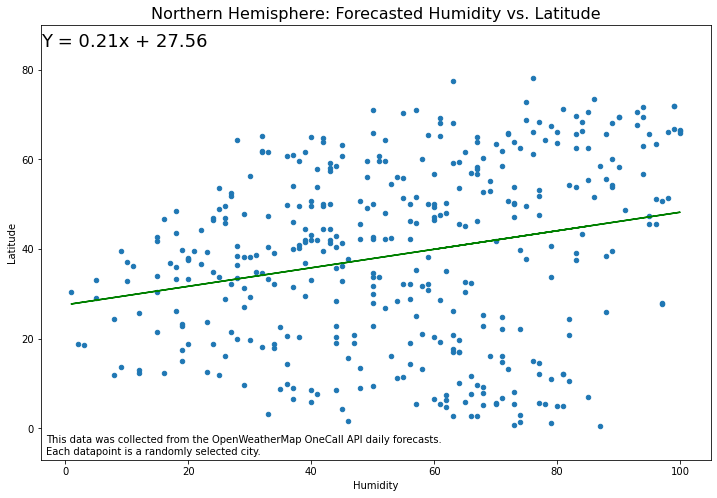

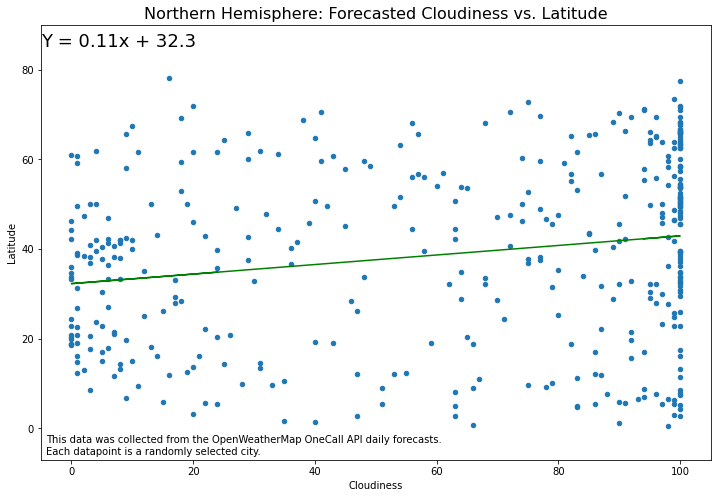

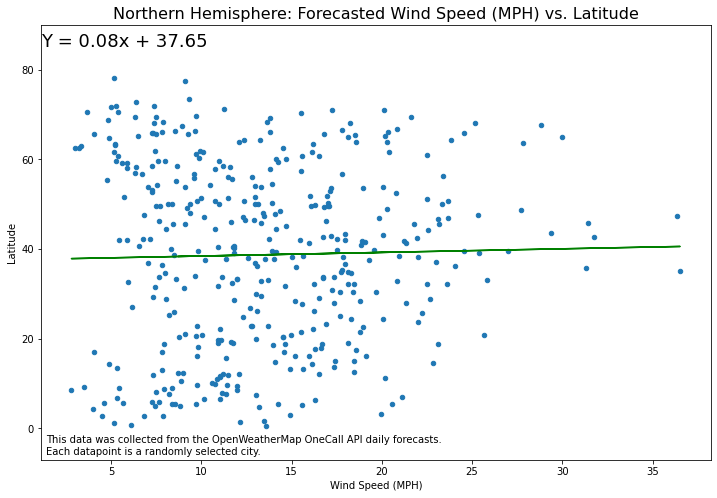

In [134]:
#Northern Hemisphere Visualizations

#Create a loop to make all plots
for element in comparelist:
    #Generate the base plot
    northernhemisphere.plot.scatter(element,"Latitude", figsize = (12,8),ylim = (-7,90))
   
    # perform linear regression and plot the resulting equation
    varaxis = northernhemisphere[f"{element}"]
    (m,b,rvalue,pvalue,stderr) = st.linregress(varaxis,northernhemisphere["Latitude"])
    linearfit = m * varaxis + b
    plt.plot(varaxis,linearfit,'green')
    
    #Improve the format of the visualization
    regressioneq = "Y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.annotate(regressioneq,xy=(0,0.95),fontsize = 18,xycoords='axes fraction')
    plt.title(f'Northern Hemisphere: Forecasted {element} vs. Latitude', fontsize =16)
    plt.annotate(f'''This data was collected from the OpenWeatherMap OneCall API daily forecasts.
Each datapoint is a randomly selected city.''',xy=(5,5),xycoords="axes pixels",fontsize = 10)
    
    #Save to file
    imagename = f"..\\Images\\NH_{element}vslat"
    plt.savefig(imagename, format='png')